In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Einstein image
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None

In [3]:
# Define the Sobel-X filter
sobel_x = np.array([[1, 0, -1], 
                    [2, 0, -2], 
                    [1, 0, -1]])

# Define the Sobel-Y filter
sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])

print("Sobel X filter:")
print(sobel_x)

print("\nSobel Y filter:")
print(sobel_y)

Sobel X filter:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Sobel Y filter:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [4]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_y)

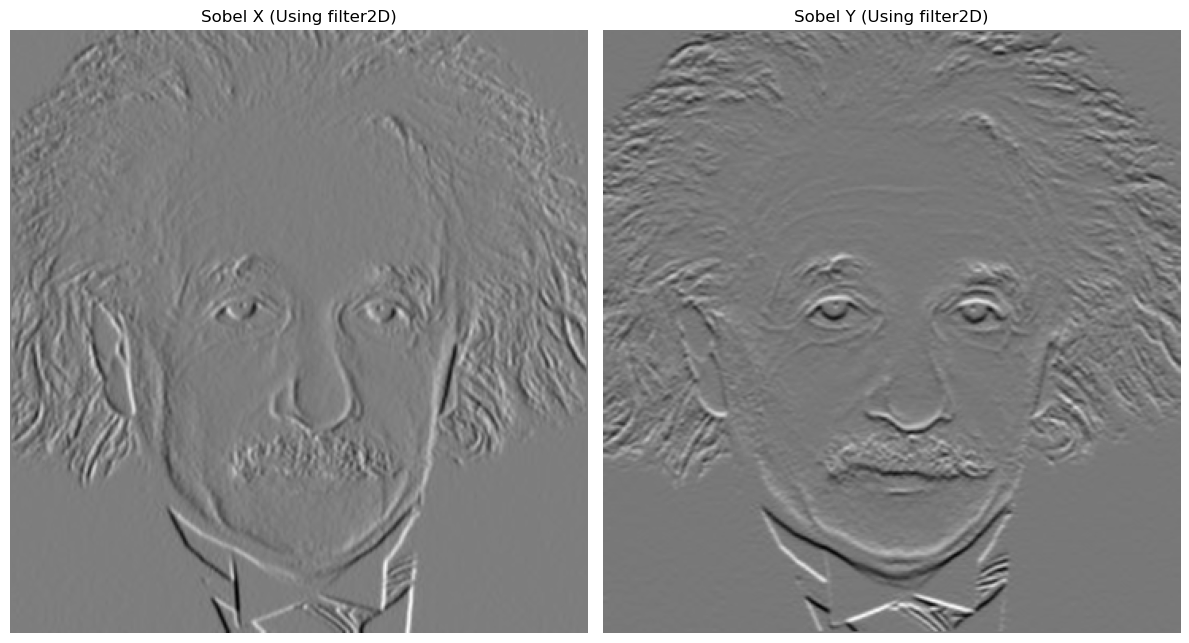

In [5]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using filter2D)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using filter2D)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [6]:
def apply_filter(image, filter):
    [rows, columns] = np.shape(image) # Get rows and columns of the image
    filtered_image = np.zeros(shape=(rows, columns)) # Create empty image
    
    for i in range(rows - 2):
        for j in range(columns - 2): # Process 2D convolution
            value = np.sum(np.multiply(filter, image[i:i + 3, j:j + 3])) 
            filtered_image[i + 1, j + 1] = value
    
    return filtered_image

In [7]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = apply_filter(einstein, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = apply_filter(einstein, sobel_y)

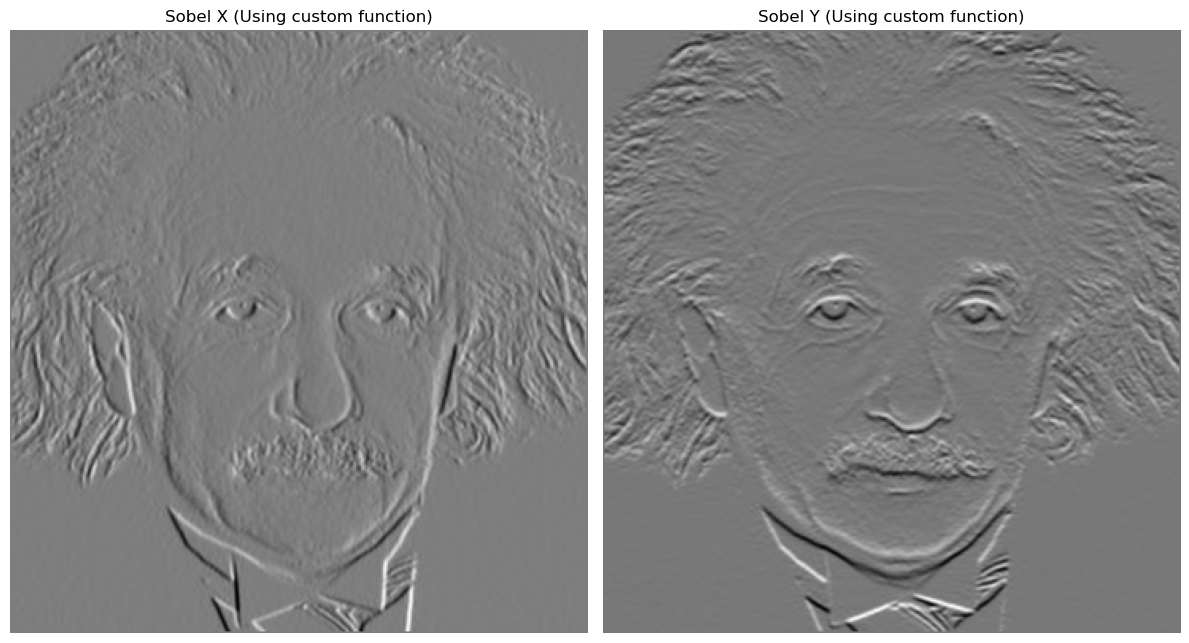

In [8]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using custom function)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using custom function)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [9]:
# Sobel x filter seperated
sobel_x_vertical = np.array([[1], [2], [1]])
sobel_x_horizontal = np.array([[1, 0, -1]])

# Sobel y filter seperated
sobel_y_vertical = np.array([[1], [0], [-1]])
sobel_y_horizontal = np.array([[1, 2, 1]])

# Apply the vertical and horizontal filters consecutively
x_mid = cv.filter2D(einstein, cv.CV_64F, sobel_x_horizontal)
x_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

y_mid = cv.filter2D(einstein, cv.CV_64F, sobel_y_vertical)
y_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)

print(sobel_x_vertical @ sobel_x_horizontal)
print(sobel_y_vertical @ sobel_y_horizontal)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


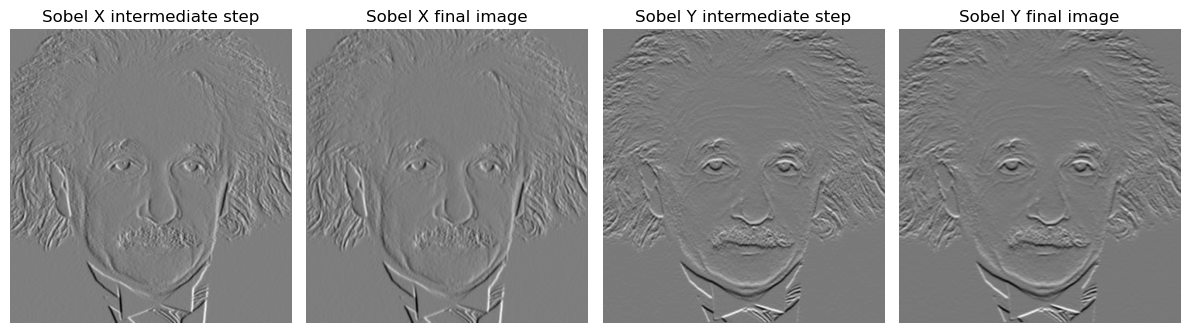

In [10]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X intermediate step')
ax[0].axis("off")
ax[1].imshow(x_filtered_image, cmap='gray')
ax[1].set_title('Sobel X final image')
ax[1].axis("off")
ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y intermediate step')
ax[2].axis("off")
ax[3].imshow(y_filtered_image, cmap='gray')
ax[3].set_title('Sobel Y final image')
ax[3].axis("off")

plt.tight_layout()
plt.show()